In [1]:
# Ariel Hasse, David Hitlin, SURF; This program creates best fits for the Solarblind PMT. 
# The final output is the calibration equation and the quenching factor equation. 
# Solarblind PMT; 2170 Volts

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize 
from scipy import stats
from scipy.optimize import curve_fit
import math

In [2]:
def alldata(file):
    '''This function takes data from a file and outputs the columns into two lists. 
    The file must have two columns of data seperated by a tab'''
    point = []
    num = ''
    first = ''
    second = ''
    x = []
    y = []
    f = open(file, 'r')
    f.readline()
    for line in f:
        num = ''
        point = list(line)
        for i in range(len(point)):
            if point[0] == '\t':
                del point[0]
                first = num
                break
            else: 
                num += point[0]
                del point[0]
        num = ''
        for i in range(len(point)):
            if point[0] == '\t':
                del point[0]
                second = num
                break
            else: 
                num += point[0]
                del point[0]
        x.append(float(first))
        y.append(float(second))
    return x, y

In [3]:
def alldata2(file):
    '''Takes a text file and categorizes the data into two arrays based off of
    columns. Outputs two arrays, one for x and one for y'''
    data = np.genfromtxt(file)
    x = data[0]
    y = data[1]
    return x, y
    

In [4]:
def energy(x, y, upper, lower):
    ''' This function takes two lists and two integers and outputs two lists
    within the integer bounds. The bounds are determined by the x variable''' 
    g = 0
    newx = []
    newy = []
    for i in range(len(x)):
        if x[g] > lower:
                if x[g] < upper:
                    newx.append(x[g])
                    newy.append(y[g])
        g += 1
    return newx, newy
 

In [5]:
def rawdata(x, y, title, xname, yname, legend):
    ''' This function takes two lists and graphing information and plots the 
    lists against eachother'''
    plt.plot(x, y, label = legend)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()
    plt.show()

In [6]:
def bestfit(x, y):
    ''' This function takes two lists and finds the line of bestfit'''
    best = np.polyfit(x, y, 2, full = True)
    plt.plot(x, np.poly1d(np.polyfit(x, y, 2))(x))
    return best 
 

In [7]:
def poly(guess):
    '''This is a polynomial chi squared sum. The argument requires a list of
    three variables and x and y lists must be defined outside of the function
    in the porgram'''
    arx = np.asarray(x1)
    ary = np.asarray(y1)
    return sum(np.power(guess[0]*np.power(arx, 2) + guess[1]*arx + guess[2] - ary, 2))
  

In [8]:
def gauss(guess):
    '''This is a gaussian chi squared sum. The argument requires a list of
    three variables and x and y lists must be defined outside of the function
    in the porgram'''
    arx = np.asarray(x1)
    ary = np.asarray(y1)
    return sum(np.power(guess[0]*np.exp(-np.power((arx-guess[1]), 2)/(2*np.power(guess[2], 2))) + guess[3]*arx + guess[4] - ary, 2))
    

In [9]:
def optimize(f, guess):
    '''Takes a function and potential parameters and outputs the minimized 
    values for the guess'''
    fit = minimize(f, guess, method= 'Nelder-Mead', bounds = ((0, None), (0, None), (0, None), (None, 0), (0, None)))
    return fit
   
  

In [10]:
def linefitpoly(opt, x, title, xname, yname, legend):
    ''' This plots the line of best fit from the optimize function for a 
    ploynomial'''
    ans = list(opt.x)
    ct = 0
    y = []
    for i in x:
        y.append(ans[0]*np.power(x[ct], 2) + ans[1]*x[ct] + ans[2])
        ct += 1
    plt.plot(x, y, label = legend)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()
    plt.show()

In [11]:
def linefitgauss(opt, x, title, xname, yname, legend):
    ''' This plots the line of best fit from the optimize function for a 
    ploynomial'''
    ans = list(opt.x)
    i = 0
    y = []
    for i in x:
        y.append(ans[0]*np.exp(-np.power((i-ans[1]), 2)/(2*np.power(ans[2], 2)))+ ans[3]*i + ans[4])
    plt.plot(x, y)
    plt.plot(x, y, label = legend)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()
    plt.show()

 

In [12]:
def linefitgaussRn(opt, x, title, xname, yname, legend):
    ''' This plots the line of best fit from the optimize function for a 
    ploynomial'''
    ans = list(opt.x)
    i = 0
    y = []
    for i in x:
        y.append(ans[0]*np.exp(-np.power((i-ans[1]), 2)/(2*np.power(ans[2], 2)))+\
            ans[3]*np.exp(-np.power((i-ans[4]), 2)/(2*np.power(ans[5], 2))) +\
            ans[6]*np.exp(-np.power((i-ans[7]), 2)/(2*np.power(ans[8], 2)))+ ans[9]*i + ans[10])
    plt.plot(x, y)
    plt.plot(x, y, label = legend)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()
    plt.show()        
 

In [13]:
def gaussRn(guess):
    '''This is a gaussian chi squared sum. The argument requires a list of
    three variables and x and y lists must be defined outside of the function
    in the porgram'''
    arx = np.asarray(x1)
    ary = np.asarray(y1)
    return sum(np.power(guess[0]*np.exp(-np.power((arx-guess[1]), 2)/(2*np.power(guess[2], 2)))\
        + guess[3]*np.exp(-np.power((arx-guess[4]), 2)/(2*np.power(guess[5], 2))) + \
        guess[6]*np.exp(-np.power((arx-guess[7]), 2)/(2*np.power(guess[8], 2))) + arx*guess[9] + guess[10] - ary, 2))
                                                      
                                           

In [14]:
def resolution(opt):
    '''This finds the resolution of the fit using the width, standard deviation
    and the center, the mean'''
    values = list(opt.x)
    return values[2]/values[1]
    

In [15]:
def conversion(opt, y):
    '''Automated Line of Best Fit for gamma and electron sources'''
    y = []
    x = []
    rawx =[]
    for i in opt:
        rawx.append(i)
    for i in rawx:
        x.append(i[1])
    for i in y:
        y.append(i)
    plt.errorbar(x, y, xerr = (opt[0][0], opt[1][0], opt[2][0]))
    plt.scipy.stats.linregress(x, y)
    plt.show()

In [16]:
def line(x, i, j):
    ''' A linear function'''
    return i*x + j  

In [17]:
def chan_kev():
    '''By replacing the y, and err values the function plots the points with
    their error and plots the line of bestfit. The error values are not correct. Cobalt is not used in this
    data set since the resolution was not clear enough.'''
    x = [60, 511, 662, 1274]
    y = [694.6, 6183, 8827, 13728.3]
    err = [340.5, 794, 1049.4, 2116.1]
    names = [' ', 'Na-22 First  ', 'Cs-137  ', 'Na-22 Second  ']
    first = ['  AmBe-241']
    yfit = []
    linfit = curve_fit(line, x, y, guessregress, sigma = err)
    for i in range(1400):
        yfit.append(i*linfit[0][0] + linfit[0][1])
    plt.errorbar(x, y, yerr= err, linestyle = 'None', marker = 'o', label = 'Raw Data Points')
    plt.plot(range(1400), yfit, label = 'Line of Best Fit')
    plt.ylim(-100, 17000)
    plt.title('Channel to Kev Count for Three Radioactive Sources')
    plt.xlabel('Known Particle Energy (KeV)')
    plt.ylabel('Channels (ADC)')
    plt.legend(loc = 2)
    #for i, txt in enumerate(names):
        #plt.annotate(txt, (x[i],y[i]), ha = 'right')
        #plt.show()
    #for i, txt in enumerate(first):
        #plt.annotate(txt, (x[i], y[i]), ha = 'left')
        #plt.show()
    plt.show()    
    print linfit
  

In [18]:
def radium():
    '''x represents the known keV values for the Ra impurities and y represents 
    the measured values in channels. This function outputs the quenching factor 
    for each measurement'''
    known = [4800, 5500, 6000, 7700]
    measured = [11236.1, 13860, 16179.6, 22306.4]
    error1 = [1036.6, 1460.1, 888.8, 1432.7]
    error2 = []
    names = ['Ra-226    ', 'Ra-222    ', 'Po-218   ', 'Po-214    ']
    coun = 0
    tick = 0
    quench = []
    yfit = []
    for i in measured:
        pred = i*0.082854
        quench.append(known[coun]/pred)
        coun += 1
    linfit = stats.linregress(known, quench)
    for i in range(8000):
        yfit.append(i*linfit[0] + linfit[1])
    for i in error1:
        exper = measured[tick]
        recor = known[tick]
        error2.append((i*recor)/(math.pow(exper, 2)))
        tick += 1
    plt.plot(range(8000), yfit, label = 'Line of Best Fit')
    plt.xlim(4000, 8000)
    plt.errorbar(known, quench, yerr = error2, marker = 'o', linestyle = 'None', label = 'Quenching Factor')
    plt.title('Quenching Factor at Various Energies for Ra 226 in BaF2')
    plt.xlabel('Energy in keV')
    plt.ylabel('Quenching Factor (Birks Constant)')
    plt.legend(loc = 1)
    #for i, txt in enumerate(names):
        #plt.annotate(txt, (known[i],quench[i]), ha = 'right')
        #plt.show()
    plt.show()
    return quench
    
    

 

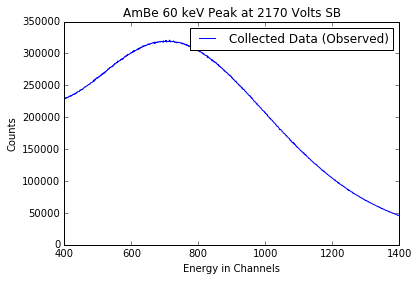

/Users/arielhasse/anaconda2/lib/python2.7/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


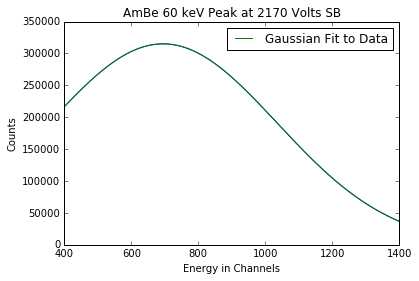

0.490255724851
[  3.15119830e+05   6.94571971e+02   3.40517885e+02   5.65564781e-05
   1.37522119e-04]


In [19]:
# AmBe 241

poly = [-.000001, .2, -1600]

hyp = [30000, 700, 600, -.00001, -.0001]

threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]

x1 = energy(alldata('AmBeSB2170.txt')[0], alldata('AmBeSB2170.txt')[1], 1400, 400)[0]
y1 = energy(alldata('AmBeSB2170.txt')[0], alldata('AmBeSB2170.txt')[1], 1400, 400)[1]  
        
rawdata(x1, y1, 'AmBe 60 keV Peak at 2170 Volts SB', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
fitted = optimize(gauss, hyp)
linefitgauss(fitted, x1, 'AmBe 60 keV Peak at 2170 Volts SB', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)
print fitted.x

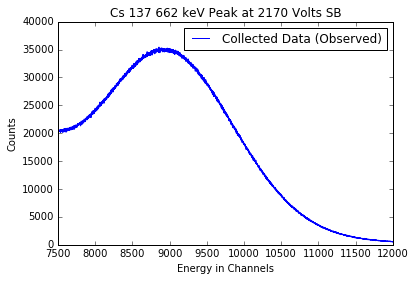

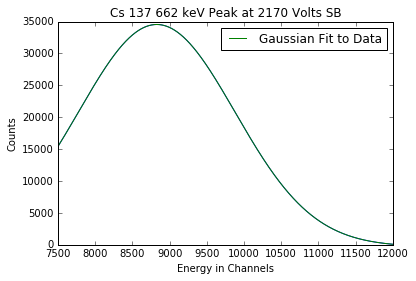

0.118889711099
[  3.47505615e+04   8.82700909e+03   1.04944056e+03  -2.30013382e-02
   5.68919394e-02]


In [20]:
# Cs 137

poly = [-.000001, .2, -1600]

hyp = [35000, 9000, 2000, -.00001, -.0001]

threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]

x1 = energy(alldata('CsSB2170.txt')[0], alldata('CsSB2170.txt')[1], 12000, 7500)[0]
y1 = energy(alldata('CsSB2170.txt')[0], alldata('CsSB2170.txt')[1], 12000, 7500)[1]  
        
rawdata(x1, y1, 'Cs 137 662 keV Peak at 2170 Volts SB', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
fitted = optimize(gauss, hyp)
linefitgauss(fitted, x1, 'Cs 137 662 keV Peak at 2170 Volts SB', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)
print fitted.x

In [21]:
# Co 60 First Peak; Data not available for the Solarblind PMT because the resolution was too poor.

#poly = [-.000001, .2, -1600]

#hyp = [3500, 5900, 300, -.45, -.0001]

#threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]

#x1 = energy(alldata('CoSB2170.txt')[0], alldata('CoSB2170.txt')[1], 6200, 5500)[0]
#y1 = energy(alldata('CoSB2170.txt')[0], alldata('CoSB2170.txt')[1], 6200, 5500)[1]  
        

#rawdata(x1, y1, 'Co 60 1170 keV Peak at 2170 Volts SB', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
#fitted = optimize(gauss, hyp)
#linefitgauss(fitted, x1, 'Co 60 1170 keV Peak at 2170 Volts SB', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
#print resolution(fitted)
#print fitted.x

In [22]:
# Co 60 Second Peak; Data not available for the Solarblind PMT because the resolution was too poor.

#poly = [-.000001, .2, -1600]

#hyp = [1500, 6700, 800, -.09, -.0001]

#threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]

#x1 = energy(alldata('Co2UV1460.txt')[0], alldata('Co2UV1460.txt')[1], 7200, 6300)[0]
#y1 = energy(alldata('Co2UV1460.txt')[0], alldata('Co2UV1460.txt')[1], 7200, 6300)[1]  
        

#rawdata(x1, y1, 'Co 60 1330 keV Peak at 1460 Volts 2UV', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
#fitted = optimize(gauss, hyp)
#linefitgauss(fitted, x1, 'Co 60 1330 keV Peak at 1350 Volts', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
#print resolution(fitted)
#print fitted.x

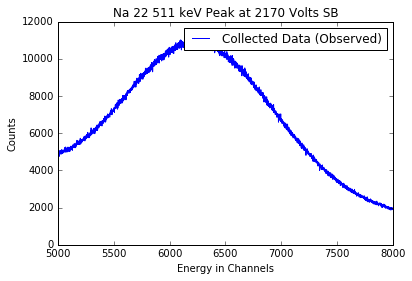

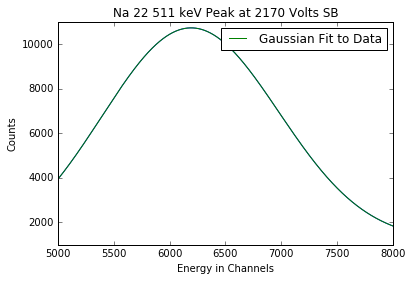

0.128408748687
[  9.84877428e+03   6.18308838e+03   7.93962642e+02   1.40817172e-01
  -8.62292199e-01]


In [23]:
# Na 22 First Peak

poly = [-.000001, .2, -1600]

hyp = [10000, 6500, 3000, -.00001, -.0001]

threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]

x1 = energy(alldata('NaSB2170.txt')[0], alldata('NaSB2170.txt')[1], 8000, 5000)[0]
y1 = energy(alldata('NaSB2170.txt')[0], alldata('NaSB2170.txt')[1], 8000, 5000)[1]  
        
rawdata(x1, y1, 'Na 22 511 keV Peak at 2170 Volts SB', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
fitted = optimize(gauss, hyp)
linefitgauss(fitted, x1, 'Na 22 511 keV Peak at 2170 Volts SB', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)
print fitted.x

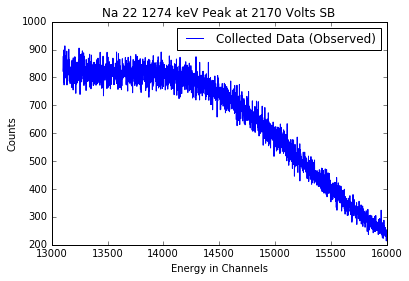

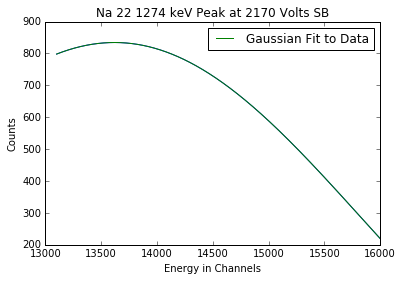

0.154139014307
[  1.24429498e+03   1.37282542e+04   2.11605957e+03  -2.99729989e-02
  -8.88707676e-05]


In [24]:
# Na 22 Second Peak

poly = [-.000001, .2, -1600]

hyp = [500, 14500, 1000, -.1, -.0001]

threepeaks = [40, 14000, 1000, 40, 17000, 1000, 40, 20000, 1000, 0, 0]

x1 = energy(alldata('NaSB2170.txt')[0], alldata('NaSB2170.txt')[1], 16000, 13100)[0]
y1 = energy(alldata('NaSB2170.txt')[0], alldata('NaSB2170.txt')[1], 16000, 13100)[1]  
        
rawdata(x1, y1, 'Na 22 1274 keV Peak at 2170 Volts SB', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
fitted = optimize(gauss, hyp)
linefitgauss(fitted, x1, 'Na 22 1274 keV Peak at 2170 Volts SB', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)
print fitted.x

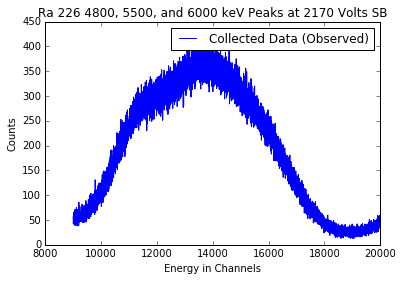

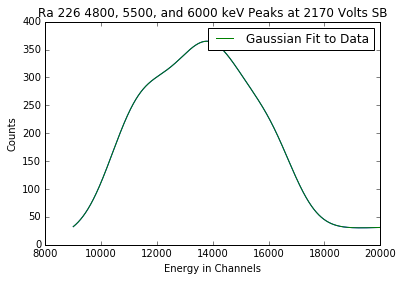

0.0922581652983
[  1.76285785e+02   1.12361207e+04   1.03662388e+03   3.32899155e+02
   1.38599425e+04   1.46013591e+03   9.16131975e+01   1.61796337e+04
   8.88805842e+02   1.55070630e-03  -4.38810716e-03]


In [25]:
# Ra 226 First Three Peaks

threepeaks = [500, 11000, 600, 140, 14000, 1000, 100, 15800, 1100, 0, 0]

x1 = energy(alldata('RaSB2170.txt')[0], alldata('RaSB2170.txt')[1], 20000, 9000)[0]
y1 = energy(alldata('RaSB2170.txt')[0], alldata('RaSB2170.txt')[1], 20000, 9000)[1]  
        
rawdata(x1, y1, 'Ra 226 4800, 5500, and 6000 keV Peaks at 2170 Volts SB', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
fitted = optimize(gaussRn, threepeaks)
linefitgaussRn(fitted, x1, 'Ra 226 4800, 5500, and 6000 keV Peaks at 2170 Volts SB', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)
print fitted.x

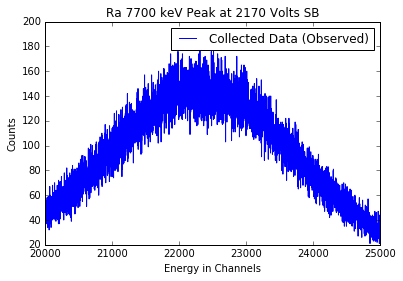

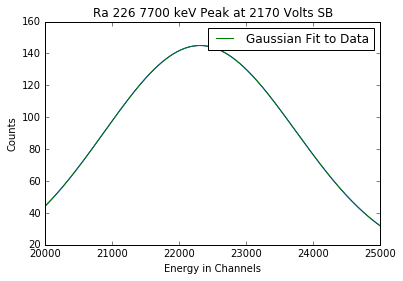

0.0642289254336
[  1.37474525e+02   2.23064169e+04   1.43271719e+03   3.37175489e-04
   5.61585309e-03]


In [26]:
# Ra 226 Fourth Peak

poly = [-.000001, .2, -1600]

hyp = [150, 22500, 5000, 0, 0]

threepeaks = [80, 10000, 1200, 80, 12000, 1200, 80, 14200, 1200, 0, 0]

x1 = energy(alldata('RaSB2170.txt')[0], alldata('RaSB2170.txt')[1], 25000, 20000)[0]
y1 = energy(alldata('RaSB2170.txt')[0], alldata('RaSB2170.txt')[1], 25000, 20000)[1]  
        
rawdata(x1, y1, 'Ra 7700 keV Peak at 2170 Volts SB', 'Energy in Channels', 'Counts', 'Collected Data (Observed)')
fitted = optimize(gauss, hyp)
linefitgauss(fitted, x1, 'Ra 226 7700 keV Peak at 2170 Volts SB', 'Energy in Channels', 'Counts', 'Gaussian Fit to Data')
print resolution(fitted)
print fitted.x

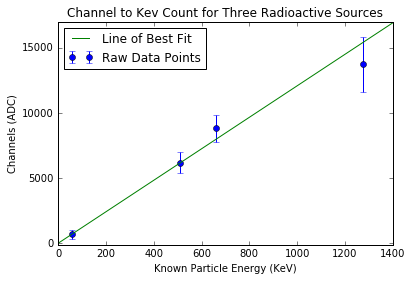

(array([ 12.0694256 ,  14.25062325]), array([[  8.06896771e-01,  -1.57478317e+02],
       [ -1.57478317e+02,   8.57681857e+04]]))


In [27]:
guessregress = [11, 50]
chan_kev()

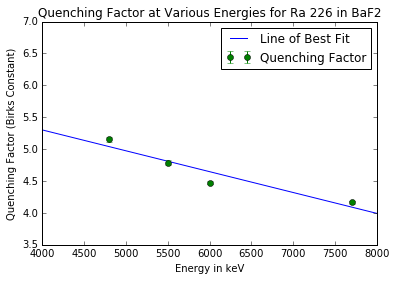

[5.155991131280197, 4.789453699584773, 4.475792970019146, 4.166273337999092]

In [28]:
radium()